<a href="https://colab.research.google.com/github/achynaliev/DS_101/blob/main/Copy_of_fitness_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Фитнес.

Давайте представим, что вы решили помоч другу, у которого свой фитнес центр. Он хочет увеличить прибыльность своего бизнеса и найти решения, которые позволят ему это сделать. Вы, как начинающий дата сайнтист решили посоветовать ему собирать данные о клиентах чтобы сделать некоторые выводы.



## Генерация данных

In [ ]:
import random
import pandas as pd

In [ ]:
client_id = ['ID_' + str(random.randrange(10000, 100000)) for i in range(1000)]
age = [random.randrange(18, 60) for i in range(1000)]
height = [random.randrange(155, 198) for i in range(1000)]
weight = [random.randrange(40, 120) for i in range(1000)]
sex_dict = {0: 'M', 1: 'F'}
sex = [sex_dict[random.randrange(2)] for i in range(1000)]
trener = [random.randrange(2) for i in range(1000)]
long_time = [random.randrange(1, 25) for i in range(1000)]
price_dict = {0:2000, 1:3500, 2: 5000, 3:7000}
tarif = [random.randrange(4) for i in range(1000)]
price = [price_dict[i] for i in tarif]

In [ ]:
lable = [client_id, age, height, weight, sex, trener, long_time, tarif, price]
title = ['client_id', 'age', 'height', 'weight', 'sex', 'trener', 'long_time', 'tarif', 'price']
table = [[j[i] for j in lable] for i in range(1000)]

In [ ]:
def go():
  print(*title)
  for i in range(22):
    for j in table[i]:
      t = len(str(j))
      print(j, end='  ' + ' '*(4-t))
    print()


In [ ]:
df = pd.DataFrame({'client_id': client_id, 'age': age, 'height': height, 'weight': weight, 'sex': sex, 'trener': trener, 'long_time': long_time, 'tarif': tarif, 'price': price})

In [ ]:
df['IMT'] = (df.weight/(df.height/100)**2).map(lambda i: round(i, 2))

In [ ]:
inter = ['underweight', 'normal weight', 'overweight', 'obesity_1st', 'obesity_2nd', 'obesity_3rd']
def interpreted_IMT(x):
  if x < 18.5:
    return inter[0]
  elif (x>=18.5) and (x<25):
    return inter[1]
  elif (x>=25) and (x<30):
    return inter[2]
  elif (x>=30) and (x<35):
    return inter[3]
  elif (x>=35) and (x<40):
    return inter[4]
  else:
    return inter[5]
df['interpreted_IMT'] = df['IMT'].map(interpreted_IMT)

In [ ]:
for i in range(df.shape[0]):
  if (df.loc[i, 'tarif'] == 0 or df.loc[i, 'tarif'] == 0) and (df.loc[i, 'trener'] == 1):
    df.loc[i, 'price'] = df.loc[i, 'price'] + 4000

In [ ]:
df

,client_id,age,height,weight,sex,trener,long_time,tarif,price,IMT,interpreted_IMT
0,ID_23008,28,183,111,F,0,9,3,7000,33.15,obesity_1st
1,ID_82144,57,158,56,M,1,22,2,5000,22.43,normal weight
2,ID_64064,36,184,64,M,0,12,3,7000,18.90,normal weight
3,ID_55593,24,166,71,M,1,23,1,3500,25.77,overweight
4,ID_91313,22,176,63,M,0,20,2,5000,20.34,normal weight
...,...,...,...,...,...,...,...,...,...,...,...
995,ID_56044,58,182,75,M,1,22,3,7000,22.64,normal weight
996,ID_16005,21,183,65,F,0,23,3,7000,19.41,normal weight
997,ID_69164,58,191,84,M,1,12,2,5000,23.03,normal weight
998,ID_98615,47,186,72,F,1,23,1,3500,20.81,normal weight


## Мы только что сгенерили данные на рандоме. Будем считать, что они получены от реального фитнес центра.

In [ ]:
go()

client_id age height weight sex trener long_time tarif price
ID_23008  28    183   111   F     0     9     3     7000  
ID_82144  57    158   56    M     1     22    2     5000  
ID_64064  36    184   64    M     0     12    3     7000  
ID_55593  24    166   71    M     1     23    1     3500  
ID_91313  22    176   63    M     0     20    2     5000  
ID_25858  25    170   77    M     1     8     3     7000  
ID_32539  40    171   69    F     1     9     3     7000  
ID_65848  27    165   76    M     1     11    3     7000  
ID_43302  56    164   75    F     1     21    1     3500  
ID_34578  48    163   58    M     0     10    3     7000  
ID_38441  30    192   76    F     0     10    3     7000  
ID_54271  38    170   106   F     0     24    0     2000  
ID_57251  34    166   55    F     0     7     2     5000  
ID_52754  27    165   82    F     1     6     0     2000  
ID_41784  53    168   80    F     0     3     3     7000  
ID_97925  31    169   97    M     1     10    0     20

# Давайте для каждого клиента расчитаем индекс массы тела

формула расчета берется из гугла. Для расчета потребуется рост в МЕТРАХ и масса тела в КИЛОГРАММАХ.

$$ ind = \frac{weight}{height^2}$$

In [ ]:
# your code
title.append('IMT')

In [ ]:
for client in table:
  client.append(round(client[3]/(client[2] / 100)**2,2))

In [ ]:
go()

client_id age height weight sex trener long_time tarif price IMT
ID_23008  28    183   111   F     0     9     3     7000  33.15  
ID_82144  57    158   56    M     1     22    2     5000  22.43  
ID_64064  36    184   64    M     0     12    3     7000  18.9  
ID_55593  24    166   71    M     1     23    1     3500  25.77  
ID_91313  22    176   63    M     0     20    2     5000  20.34  
ID_25858  25    170   77    M     1     8     3     7000  26.64  
ID_32539  40    171   69    F     1     9     3     7000  23.6  
ID_65848  27    165   76    M     1     11    3     7000  27.92  
ID_43302  56    164   75    F     1     21    1     3500  27.89  
ID_34578  48    163   58    M     0     10    3     7000  21.83  
ID_38441  30    192   76    F     0     10    3     7000  20.62  
ID_54271  38    170   106   F     0     24    0     2000  36.68  
ID_57251  34    166   55    F     0     7     2     5000  19.96  
ID_52754  27    165   82    F     1     6     0     2000  30.12  
ID_41784  53 

# Давайте проинтерпретируем полученные данные и добавим новую колонку "interpreted_IMT" по следущему принципу:

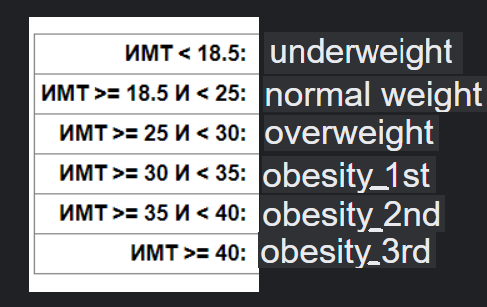

In [ ]:
# your code

In [ ]:
inter = ['underweight', 'normal weight', 'overweight', 'obesity_1st', 'obesity_2nd', 'obesity_3rd']
title.append('weight_status')

for client in table:
  if client[9] < 18.5:
    client.append(inter[0])
  elif client[9] >= 18.5 and client[9] < 25:
    client.append(inter[1])
  elif client[9] >= 25 and client[9] < 30:
    client.append(inter[2])
  elif client[9] >= 30 and client[9] < 35:
    client.append(inter[3])
  elif client[9] >= 35 and client[9] < 40:
    client.append(inter[4])
  else:
    client.append(inter[5])




In [ ]:
go()

client_id age height weight sex trener long_time tarif price IMT weight_status
ID_23008  28    183   111   F     0     9     3     7000  33.15  obesity_1st  
ID_82144  57    158   56    M     1     22    2     5000  22.43  normal weight  
ID_64064  36    184   64    M     0     12    3     7000  18.9  normal weight  
ID_55593  24    166   71    M     1     23    1     3500  25.77  overweight  
ID_91313  22    176   63    M     0     20    2     5000  20.34  normal weight  
ID_25858  25    170   77    M     1     8     3     7000  26.64  overweight  
ID_32539  40    171   69    F     1     9     3     7000  23.6  normal weight  
ID_65848  27    165   76    M     1     11    3     7000  27.92  overweight  
ID_43302  56    164   75    F     1     21    1     3500  27.89  overweight  
ID_34578  48    163   58    M     0     10    3     7000  21.83  normal weight  
ID_38441  30    192   76    F     0     10    3     7000  20.62  normal weight  
ID_54271  38    170   106   F     0     24    

In [ ]:
status = 'obesity_1st'
count = 0
for i in table:
  if i[10] == status:
    count+=1
count

163

У нас есть фичи тариф и прайс. Каждый тариф предполагает определенную ежемесячную плату. У тарифов 2 и 3 услуги тренера входят в стоимостьб но тарифы 0 и 1 такой опции не имеют.

# В данных есть ошибка (Друг некорректно собрал их...). Придется исправить!

Мы видим, что независимо от тарифа, некоторые люди пользуются услугами тренера. Стоимость его услуг составляет 4000 сом в мес.

Для тарифов 0 и 1 прибавте к прайсу стоимость услуги тренера, если клиент ею пользуется.

In [ ]:
for client in table:
  if client[7] == 0 or client[7] == 1 and client[1]:
    client[8] += 4000


In [ ]:
go()

client_id age height weight sex trener long_time tarif price IMT weight_status
ID_23008  28    183   111   F     0     9     3     7000  33.15  obesity_1st  
ID_82144  57    158   56    M     1     22    2     5000  22.43  normal weight  
ID_64064  36    184   64    M     0     12    3     7000  18.9  normal weight  
ID_55593  24    166   71    M     1     23    1     7500  25.77  overweight  
ID_91313  22    176   63    M     0     20    2     5000  20.34  normal weight  
ID_25858  25    170   77    M     1     8     3     7000  26.64  overweight  
ID_32539  40    171   69    F     1     9     3     7000  23.6  normal weight  
ID_65848  27    165   76    M     1     11    3     7000  27.92  overweight  
ID_43302  56    164   75    F     1     21    1     7500  27.89  overweight  
ID_34578  48    163   58    M     0     10    3     7000  21.83  normal weight  
ID_38441  30    192   76    F     0     10    3     7000  20.62  normal weight  
ID_54271  38    170   106   F     0     24    

## Бонусы и скидки

У нас среди клиентов есть долгожители! Давайте им сделаем скидку на 5% на все последущее время. Скорректируйте прайс для клиентов, которые посещают фитнес центр больше 12 месяцев.

In [ ]:
for client in table:
  if client[6] > 12:
    client[8] *= 0.95
    client[8] = round(client[8])


In [ ]:
go()

client_id age height weight sex trener long_time tarif price IMT weight_status
ID_23008  28    183   111   F     0     9     3     7000  33.15  obesity_1st  
ID_82144  57    158   56    M     1     22    2     4750  22.43  normal weight  
ID_64064  36    184   64    M     0     12    3     7000  18.9  normal weight  
ID_55593  24    166   71    M     1     23    1     7125  25.77  overweight  
ID_91313  22    176   63    M     0     20    2     4750  20.34  normal weight  
ID_25858  25    170   77    M     1     8     3     7000  26.64  overweight  
ID_32539  40    171   69    F     1     9     3     7000  23.6  normal weight  
ID_65848  27    165   76    M     1     11    3     7000  27.92  overweight  
ID_43302  56    164   75    F     1     21    1     7125  27.89  overweight  
ID_34578  48    163   58    M     0     10    3     7000  21.83  normal weight  
ID_38441  30    192   76    F     0     10    3     7000  20.62  normal weight  
ID_54271  38    170   106   F     0     24    

# Рекомендации

У нас к сожалению не все пользуются услугами тренера. Некоторым клиентам он особенно нужен (на наш взгляд)

Мы порекомендуем его по скидке 20 % для следущих клиентов:


# Прани:



*   От 21 до 35 лет
*   Индекс массы тела Normal weight & owerweight
*   Посещение более 3х месяцев


# Девушки

*   От 25 до 40 лет
*   Индекс массы тела: Normal weight & owerweight & obesity 1st
*   Посещение более 3х месяцев


Создайте новую фичу (колонку) с текстом 'recommended'



In [ ]:
title.append('recommended')
for client in table:
  if (client[1] > 21 and client[1] < 35) and (client[10] == 'normal weight' or client[10] == 'overweight') and client[6] > 3 and client[4] == "M":
    client.append(True)
  elif (client[1] > 25 and client[1] < 40) and (client[10] == 'normal weight' or client[10] == 'overweight' or client[10] == 'obesity_1st') and client[6] > 3 and client[4] == "F":
    client.append(True)
  else:
    client.append(False)


In [ ]:
go()

client_id age height weight sex trener long_time tarif price IMT weight_status recommended
ID_23008  28    183   111   F     0     9     3     7000  33.15  obesity_1st  True  
ID_82144  57    158   56    M     1     22    2     4750  22.43  normal weight  False  
ID_64064  36    184   64    M     0     12    3     7000  18.9  normal weight  False  
ID_55593  24    166   71    M     1     23    1     7125  25.77  overweight  True  
ID_91313  22    176   63    M     0     20    2     4750  20.34  normal weight  True  
ID_25858  25    170   77    M     1     8     3     7000  26.64  overweight  True  
ID_32539  40    171   69    F     1     9     3     7000  23.6  normal weight  False  
ID_65848  27    165   76    M     1     11    3     7000  27.92  overweight  True  
ID_43302  56    164   75    F     1     21    1     7125  27.89  overweight  False  
ID_34578  48    163   58    M     0     10    3     7000  21.83  normal weight  False  
ID_38441  30    192   76    F     0     10    3   

## Прогноз

Давайте сперва расчитаем доход центра за месяц. Учтите, тренер получает 3000 сом в месяц за одного клиента. Таким образом 1000 сом остается в бюджете.

In [ ]:
revenue = 0
for client in table:
  if client[5] == 1:
    revenue += (client[8] - 3000)
  else:
    revenue += client[8]

print(revenue)

4736325


Давайте прикинем, что после получения рекомендаций в тренере 60% клиентов согласились. 

Вычислим, каким станет ежемесячный доход центра и на сколько процентов он вырастет.

In [ ]:
count_recommended = 0
for client in table:
  if client[11] == True:
    count_recommended+=1

additional_rev = round((count_recommended * 1000) * 0.60)
print(additional_rev)

new_revenue = revenue + additional_rev
print(new_revenue)

101400
4837725
